<a href="https://colab.research.google.com/github/HaneenEzzat/Hand_Sign_Language/blob/main/Hand_Sign_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Datast handling libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Deep Learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import TextVectorization

In [ ]:
# Download dataset from Kaggle
!pip install kaggle -q

# Upload your Kaggle API token (download from your Kaggle account)
from google.colab import files
files.upload()   # upload kaggle.json here

# Setup Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Sign Language MNIST dataset
!kaggle datasets download -d datamunge/sign-language-mnist

# Unzip dataset
import zipfile
with zipfile.ZipFile("sign-language-mnist.zip", 'r') as zip_ref:
    zip_ref.extractall("./sign_mnist")

Saving kaggle.json to kaggle (2).json
Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
train_df = pd.read_csv("./sign_mnist/sign_mnist_train.csv")
test_df = pd.read_csv("./sign_mnist/sign_mnist_test.csv")

In [ ]:
print(train_df.shape)
print(test_df.shape)
train_df.head()

(27455, 785)
(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
# separate features and label
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [ ]:
# normalize pixel value
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# reshape to 28x28x1 for cnn input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Ensure labels are integers
y_train = train_df["label"].values.astype(int)
y_test  = test_df["label"].values.astype(int)

In [ ]:
# convert labels to one hot encoding
num_classes = 26
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)

(27455, 26)
(7172, 26)


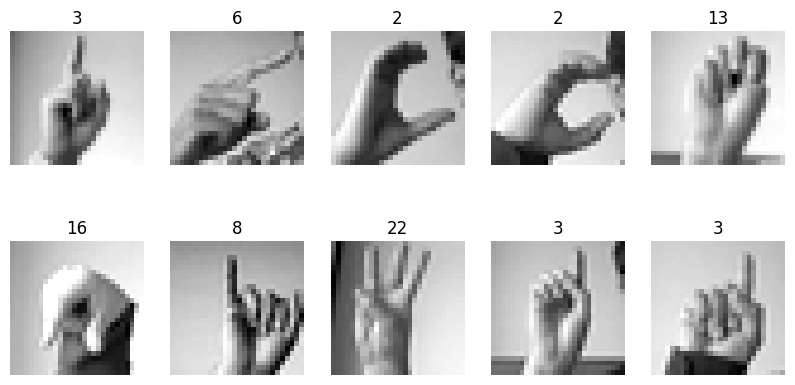

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gray")
    plt.title(np.argmax(y_train[i]))
    plt.axis("off")
plt.show()


In [ ]:
# CNN architecture
model= models.Sequential([
    # 1st con layer
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    # 2nd conv layer
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    # 3rd conv layer
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(26)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,866 (405.73 KB)

 Trainable params: 103,866 (405.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.0385 - loss: 8.9697 - val_accuracy: 0.0602 - val_loss: 10.1963
Epoch 2/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0366 - loss: 9.1710 - val_accuracy: 0.0602 - val_loss: 10.1963
Epoch 3/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0361 - loss: 9.1886 - val_accuracy: 0.0602 - val_loss: 10.1963
Epoch 4/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0357 - loss: 9.2294 - val_accuracy: 0.0602 - val_loss: 10.1963
Epoch 5/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0369 - loss: 9.2054 - val_accuracy: 0.0602 - val_loss: 10.1963
Epoch 6/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0369 - loss: 9.2216 - val_accuracy: 0.0602 - val_loss: 10.1963
Epoch 7/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0358 - loss: 9.1897 - val_accuracy: 0.0602 - val_loss: 10.1963
Epoch 8/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0390 - loss: 9.2305 - val_acc

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

225/225 - 1s - 5ms/step - accuracy: 0.0602 - loss: 10.1963

Test accuracy: 0.06023424491286278


In [ ]:
# Fix labels: map them to 0–23
y_train = train_df["label"].values
y_test  = test_df["label"].values

# Find unique labels
print("Unique labels:", np.unique(y_train))

# Map labels (since J=9 and Z=25 are missing)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_test  = encoder.transform(y_test)

num_classes = len(np.unique(y_train))  # should now be 24
print("Number of classes:", num_classes)

# One-hot encode
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes)

print("y_train shape:", y_train.shape, "y_test shape:", y_test.shape)


Unique labels: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Number of classes: 24
y_train shape: (27455, 24) y_test shape: (7172, 24)


In [ ]:
print("X_train shape:", X_train.shape)  # should be (27455, 28, 28, 1)
print("X_test shape:", X_test.shape)    # should be (7172, 28, 28, 1)
print("Pixel range:", X_train.min(), "to", X_train.max())  # should be 0–1

X_train shape: (27455, 28, 28, 1)
X_test shape: (7172, 28, 28, 1)
Pixel range: 0.0 to 1.0


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')   # <-- 24 classes
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.1659 - loss: 2.7438 - val_accuracy: 0.7119 - val_loss: 0.9817
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6888 - loss: 0.9070 - val_accuracy: 0.7797 - val_loss: 0.5612
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8618 - loss: 0.4125 - val_accuracy: 0.8480 - val_loss: 0.4009
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9270 - loss: 0.2180 - val_accuracy: 0.8702 - val_loss: 0.3537
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9621 - loss: 0.1227 - val_accuracy: 0.8929 - val_loss: 0.3098
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9767 - loss: 0.0790 - val_accuracy: 0.8887 - val_loss: 0.3290
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9839 - loss: 0.0555 - val_accuracy: 0.9025 - val_loss: 0.3178
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9864 - loss: 0.0442 - val_accuracy: 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

225/225 - 1s - 4ms/step - accuracy: 0.9112 - loss: 0.3110

Test accuracy: 0.9111824035644531


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy
acc = accuracy_score(y_true, y_pred_classes)

# Macro F1-score (treats all classes equally, not influenced by class imbalance)
macro_f1 = f1_score(y_true, y_pred_classes, average='macro')

print(f"Test Accuracy: {acc:.4f}")
print(f"Macro F1-score: {macro_f1:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy: 0.9112
Macro F1-score: 0.9052


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Get predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.8376    0.9970    0.9103       331
           1     1.0000    0.9699    0.9847       432
           2     0.9333    0.9935    0.9625       310
           3     1.0000    0.9020    0.9485       245
           4     0.9585    0.9739    0.9661       498
           5     1.0000    1.0000    1.0000       247
           6     0.8895    0.9253    0.9070       348
           7     0.9847    0.8853    0.9324       436
           8     0.9605    0.8438    0.8983       288
           9     0.9058    0.9003    0.9030       331
          10     0.9035    0.9856    0.9428       209
          11     0.9778    0.7843    0.8704       394
          12     0.9180    0.7698    0.8374       291
          13     0.9292    0.9065    0.9177       246
          14     0.9802    1.0000    0.9900       347
          15     0.9820    1.0000    0.9909       164
          16  

In [ ]:
model.save("sign_language_model.h5")

In [ ]:
! pip install streamlit opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 142.4 MB/s eta 0:00:00
